In [1]:
import mne
import numpy as np
import pandas as pd

In [2]:
data10 = mne.io.read_raw_edf('D:\Brain_siez_det\eegfiles\eeg53.edf', preload=True)
data10

Extracting EDF parameters from D:\Brain_siez_det\eegfiles\eeg53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 888319  =      0.000 ...  3469.996 secs...


C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_11952\3782619299.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  data10 = mne.io.read_raw_edf('D:\Brain_siez_det\eegfiles\eeg53.edf', preload=True)
C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_11952\3782619299.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  data10 = mne.io.read_raw_edf('D:\Brain_siez_det\eegfiles\eeg53.edf', preload=True)


<RawEDF | eeg53.edf, 21 x 888320 (3470.0 s), ~142.3 MB, data loaded>

In [3]:
df = data10.get_data()
sum = 0
rms = 0
for row in range(21):
    for col in range(df.shape[1]):
        ele = df[row][col] * 1000000
        sum += ele
        rms += (ele * ele)

In [4]:
print("sum is" , sum)
print("rms is", rms)

sum is 211871.30032592823
rms is 55650587222.345924


In [5]:
d_sum = sum
d_rms = rms

In [6]:
sum2 = d_sum
rms2 = d_rms

In [7]:
import math
rms2 = math.sqrt(rms2)
rms2 = rms2 / math.sqrt(df.shape[1])
rms2

250.29383673624963

In [8]:
print(sum)
mean = sum/(df.shape[1])
mean = mean * 1000000
mean

211871.30032592823


238507.85789572253

In [9]:
rms = mean * mean
rms 

56885998278.00617

In [10]:
df = data10.to_data_frame()
df.shape

(888320, 22)

Using matplotlib as 2D backend.


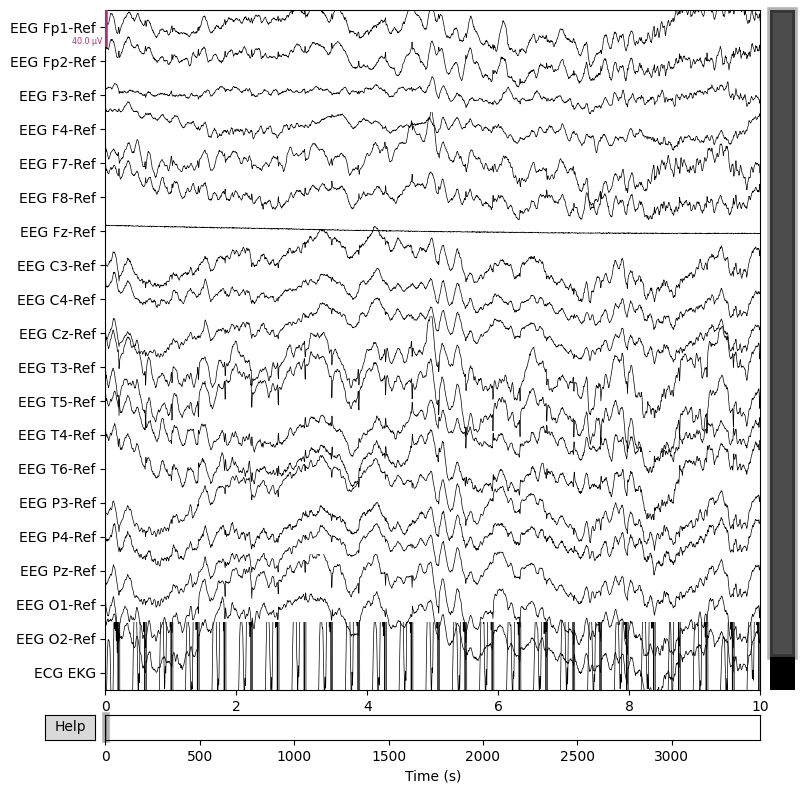

Figure(800x800)


In [11]:
print(data10.plot())

In [12]:
data10.info
data10.n_times

888320

In [13]:
data10.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG F7-Ref, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2011-11-11 11:11:11 UTC
 nchan: 21
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


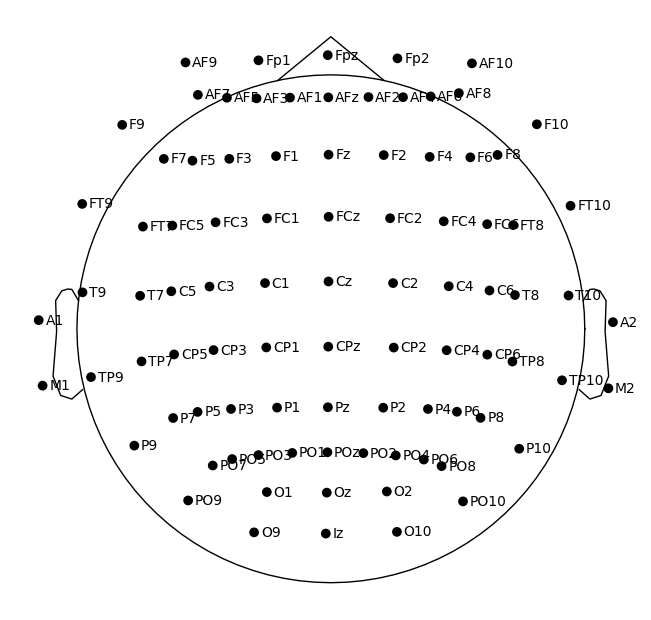

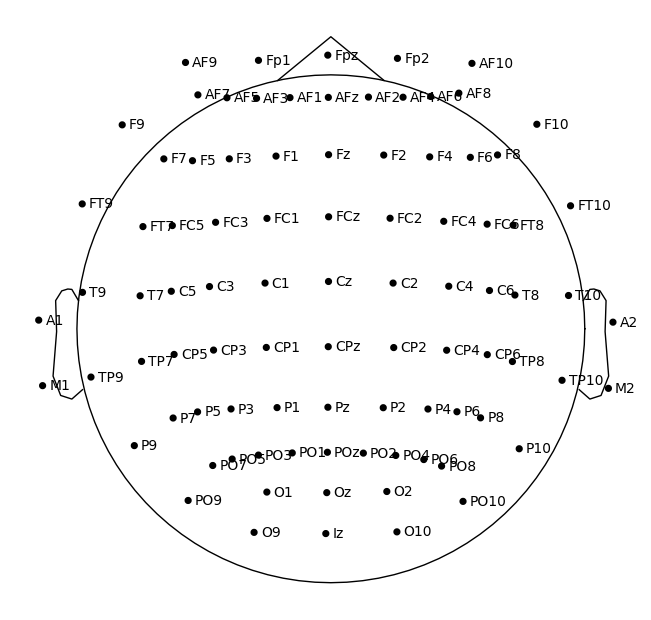

In [14]:
montage = mne.channels.make_standard_montage("standard_1020")
montage.plot()

In [17]:
data10.set_montage(montage, on_missing="ignore")  # Ignores missing channels


<RawEDF | eeg53.edf, 21 x 888320 (3470.0 s), ~142.4 MB, data loaded>

In [18]:
print(data10.load_data())

<RawEDF | eeg53.edf, 21 x 888320 (3470.0 s), ~142.4 MB, data loaded>


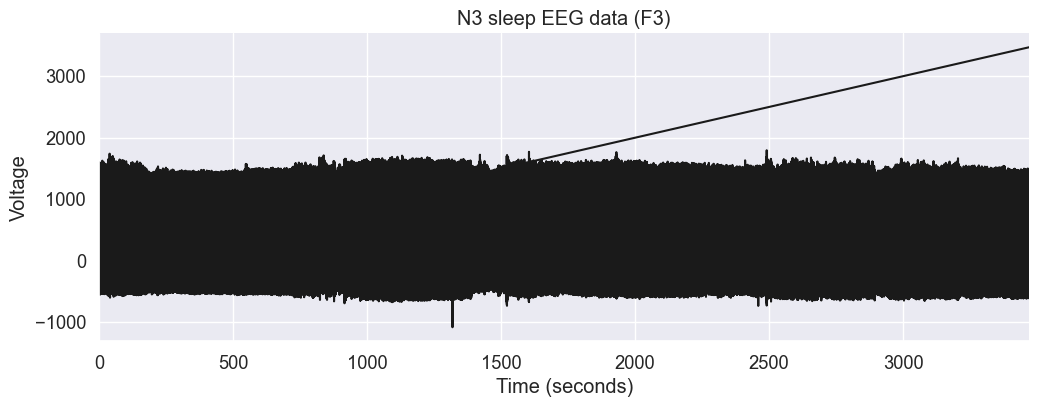

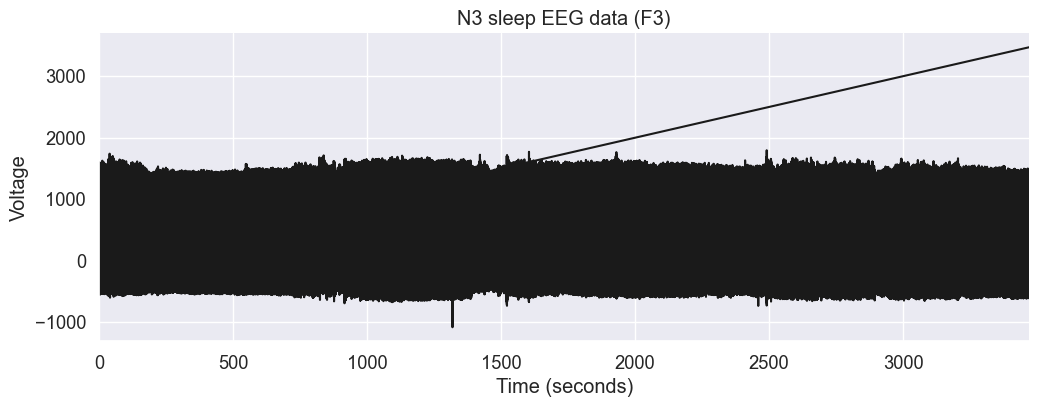

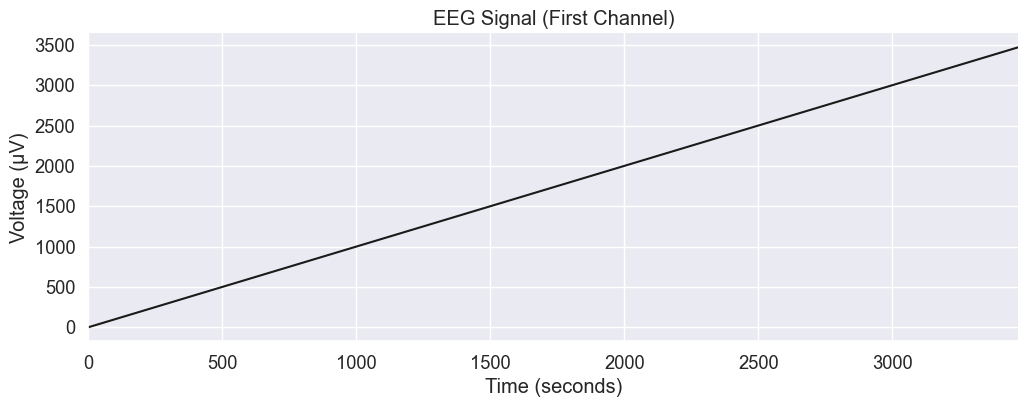

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(font_scale=1.2)

# Ensure data10 is defined
df = data10.to_data_frame()

# Define sampling frequency and time vector
sf = 256  # Modify if your EEG data has a different sampling rate
time = np.arange(df.shape[0]) / sf  # Create a time vector

# Check if df has multiple columns
if df.shape[1] > 1:
    df = df.iloc[:, 0]  # Select the first EEG channel (modify as needed)

# Plot the EEG signal
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(time, df, lw=1.5, color='k')

# Formatting
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Voltage (µV)')
ax.set_title('EEG Signal (First Channel)')
ax.set_xlim([time.min(), time.max()])
sns.despine()

plt.show()


In [21]:
# Not working for me
from scipy import signal

sf = 256
data = data10.to_data_frame()
data = data[:]

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)
freqs

# Plot the power spectrum
# sns.set(font_scale=1.2, style='white')
# plt.figure(figsize=(8, 4))
# plt.plot(freqs, psd, color='k', lw=2)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power spectral density (V^2 / Hz)')
# plt.ylim([0, psd.max() * 1.1])
# plt.title("Welch's periodogram")
# plt.xlim([0, freqs.max()])
# sns.despine()

c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 22, using nperseg = 22
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


array([  0.        ,  11.63636364,  23.27272727,  34.90909091,
        46.54545455,  58.18181818,  69.81818182,  81.45454545,
        93.09090909, 104.72727273, 116.36363636, 128.        ])

In [22]:
len(data10.info['ch_names'])

21

In [23]:
signal_rep_per_second = data10.n_times / 5427
signal_rep_per_second

163.6852773171181

In [25]:
merged = pd.read_csv('D:\Brain_siez_det\Expert Files\merged.csv')
merged.head()
merged.loc[0][9]

C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_11952\76856620.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged.loc[0][9]


0.0

In [26]:
# how to access individual elements of csv file 'merged'
print(merged.loc[0][0])
print(merged.loc[0][1])
print(merged.loc[0][2])
print(merged.loc[0][3])
print(merged.loc[0][4])
print(merged.loc[0][5])
print(merged.loc[0][6])

0.0
0.0
0.0
0.0
1.0
0.0
1.0


C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_11952\3615435202.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(merged.loc[0][0])
C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_11952\3615435202.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(merged.loc[0][1])
C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_11952\3615435202.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(merged.loc[0]

In [27]:
arr = merged['0.9']
arr

0       0
1       0
2       0
3       0
4       0
       ..
4136    0
4137    0
4138    0
4139    0
4140    0
Name: 0.9, Length: 4141, dtype: int64

In [68]:
merged.columns = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15',
       '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24',
       '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31','0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39',
       '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48',
       '0.49', '0.50', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57',
       '0.58', '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65',
       '0.66', '0.67', '0.68', '0.69', '0.70', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79']

In [32]:
merged.head()

,0,0.1,0.2,0.3,1,0.4,1.1,0.5,0.6,0.7,...,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69
0,0,0.0,0,0.0,1.0,0,1.0,0,0.0,0,...,0,0,0,0.0,0,0.0,0.0,0,0,0.0
1,0,0.0,0,0.0,1.0,0,1.0,0,0.0,0,...,0,0,0,0.0,0,0.0,0.0,0,0,0.0
2,0,0.0,0,0.0,1.0,0,1.0,0,0.0,0,...,0,0,0,0.0,0,0.0,0.0,0,0,0.0
3,0,0.0,0,0.0,1.0,0,1.0,0,0.0,0,...,0,0,0,0.0,0,0.0,0.0,0,0,0.0
4,0,0.0,0,0.0,1.0,0,1.0,0,0.0,0,...,0,0,0,0.0,0,0.0,0.0,0,0,0.0


In [33]:
events = mne.find_events(data10, stim_channel='Resp Effort')
events

array([], shape=(0, 3), dtype=int32)